In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import glob
import datetime

from sklearn.compose import make_column_transformer # Pre-procesamiento

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler # Pre-procesamiento
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # Pre-procesamiento

from sklearn.model_selection import train_test_split # Dividir datos

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score

In [2]:
#Concatenación de los datasets para formar un dataframe princiapl
df = pd.concat(map(pd.read_csv, ['incidentes-viales-c5-2017.csv', 'incidentes-viales-c5-2018.csv', 'incidentes-viales-c5-2019.csv']), ignore_index=True)
print(df)

                  folio fecha_creacion hora_creacion dia_semana  \
0       C5/170622/06952     22/06/2017      20:34:45     Jueves   
1       C5/170622/05115     22/06/2017      16:41:14     Jueves   
2       C5/170622/03715     22/06/2017      13:44:52     Jueves   
3       C5/170622/05317     22/06/2017      17:08:58     Jueves   
4       C5/170622/05348     22/06/2017      17:12:38     Jueves   
...                 ...            ...           ...        ...   
680741  C5/190930/03708     30/09/2019      13:35:37      Lunes   
680742  C5/190930/04467     30/09/2019      15:13:21      Lunes   
680743  C5/190930/00321     30/09/2019      01:30:22      Lunes   
680744  C5/190930/04969     30/09/2019      16:17:43      Lunes   
680745  GA/190930/06394     30/09/2019      19:20:54      Lunes   

                                            codigo_cierre fecha_cierre  \
0       (D) El incidente reportado se registró en dos ...   22/06/2017   
1       (D) El incidente reportado se registró 

In [3]:
#Observación de las primeras 5 columnas del dataframe
df.head()

,folio,fecha_creacion,hora_creacion,dia_semana,codigo_cierre,fecha_cierre,año_cierre,mes_cierre,hora_cierre,delegacion_inicio,incidente_c4,latitud,longitud,clas_con_f_alarma,tipo_entrada,delegacion_cierre,geopoint,mes
0,C5/170622/06952,22/06/2017,20:34:45,Jueves,(D) El incidente reportado se registró en dos ...,22/06/2017,2017,Junio,20:39:42,MILPA ALTA,accidente-choque sin lesionados,19.20137,-99.00732,EMERGENCIA,LLAMADA DEL 911,MILPA ALTA,"19.20137004,-99.00731988",6
1,C5/170622/05115,22/06/2017,16:41:14,Jueves,(D) El incidente reportado se registró en dos ...,22/06/2017,2017,Junio,16:46:02,TLAHUAC,accidente-choque sin lesionados,19.29659,-99.03443,EMERGENCIA,LLAMADA DEL 911,TLAHUAC,"19.29659004,-99.03443004",6
2,C5/170622/03715,22/06/2017,13:44:52,Jueves,(N) La unidad de atención a emergencias fue de...,22/06/2017,2017,Junio,16:48:07,VENUSTIANO CARRANZA,accidente-choque sin lesionados,19.43053,-99.05260,EMERGENCIA,LLAMADA DEL 911,VENUSTIANO CARRANZA,"19.43053002,-99.05259996",6
3,C5/170622/05317,22/06/2017,17:08:58,Jueves,(D) El incidente reportado se registró en dos ...,22/06/2017,2017,Junio,17:20:34,IZTAPALAPA,accidente-choque con lesionados,19.36189,-99.12243,URGENCIAS MEDICAS,LLAMADA DEL 911,IZTAPALAPA,"19.36188999,-99.12242988",6
4,C5/170622/05348,22/06/2017,17:12:38,Jueves,(D) El incidente reportado se registró en dos ...,22/06/2017,2017,Junio,17:25:27,IZTAPALAPA,accidente-choque con lesionados,19.36168,-99.12210,URGENCIAS MEDICAS,LLAMADA DEL 911,IZTAPALAPA,"19.36168002,-99.12210012",6


In [4]:
print('El número de filas es:', df.shape[0], ' y el número de columnas es:', df.shape[1])

El número de filas es: 680746  y el número de columnas es: 18


In [5]:
#Información estadística de cada columna
df.describe(include='all')

,folio,fecha_creacion,hora_creacion,dia_semana,codigo_cierre,fecha_cierre,año_cierre,mes_cierre,hora_cierre,delegacion_inicio,incidente_c4,latitud,longitud,clas_con_f_alarma,tipo_entrada,delegacion_cierre,geopoint,mes
count,680746,680746,680746,680746,680746,680746,680746.000000,680746,680746,680687,680746,680303.000000,680311.000000,680746,680746,680705,680300,680746.000000
unique,680746,1205,102462,7,5,1189,NaN,12,104002,16,23,NaN,NaN,4,7,16,80438,NaN
top,C5/181231/05052,26/10/2018,20:59:00,Viernes,(D) El incidente reportado se registró en dos ...,08/12/2017,NaN,Octubre,21:59:00,IZTAPALAPA,accidente-choque sin lesionados,NaN,NaN,EMERGENCIA,LLAMADA DEL 911,IZTAPALAPA,"19.37168001,-99.08024004",NaN
freq,1,1028,57,113396,318314,999,NaN,65864,92,111344,358734,NaN,NaN,377886,603973,112135,1162,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2017.972235,NaN,NaN,NaN,NaN,19.383244,-99.150441,NaN,NaN,NaN,NaN,6.565763
std,NaN,NaN,NaN,NaN,NaN,NaN,0.798132,NaN,NaN,NaN,NaN,0.373527,3.420512,NaN,NaN,NaN,NaN,3.384557
min,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN,19.095427,-991.764000,NaN,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN,19.336040,-99.180420,NaN,NaN,NaN,NaN,4.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN,19.383030,-99.140680,NaN,NaN,NaN,NaN,7.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN,19.433760,-99.095230,NaN,NaN,NaN,NaN,10.000000


In [6]:
df['incidente_c4'].unique()

array(['accidente-choque sin lesionados',
       'accidente-choque con lesionados', 'lesionado-atropellado',
       'accidente-motociclista', 'accidente-volcadura',
       'accidente-persona atrapada / desbarrancada',
       'accidente-vehiculo desbarrancado',
       'accidente-choque con prensados', 'accidente-otros',
       'cadáver-atropellado', 'cadáver-accidente automovilístico',
       'accidente-vehiculo atrapado', 'accidente-ferroviario',
       'detención ciudadana-atropellado',
       'detención ciudadana-accidente automovilístico',
       'sismo-choque sin lesionados', 'sismo-persona atropellada',
       'sismo-choque con lesionados', 'sismo-choque con prensados',
       'accidente-ciclista', 'accidente-vehículo atrapado-varado',
       'accidente-monopatín',
       'Detención ciudadana-accidente automovilístico'], dtype=object)

In [7]:
df['clas_con_f_alarma'].unique()

array(['EMERGENCIA', 'URGENCIAS MEDICAS', 'FALSA ALARMA', 'DELITO'],
      dtype=object)

In [8]:
df['clas_con_f_alarma'].value_counts()

EMERGENCIA           377886
URGENCIAS MEDICAS    297157
FALSA ALARMA           5248
DELITO                  455
Name: clas_con_f_alarma, dtype: int64

In [9]:
df['codigo_cierre'].unique()

array(['(D) El incidente reportado se registró en dos o más ocasiones procediendo a mantener un único reporte (afirmativo, informativo, negativo o falso) como el identificador para el incidente',
       '(N) La unidad de atención a emergencias fue despachada, llegó al lugar de los hechos, pero en el sitio del evento nadie solicitó el apoyo de la unidad',
       '(A) La unidad de atención a emergencias fue despachada, llegó al lugar de los hechos y confirmó la emergencia reportada',
       '(F) El operador/a o despachador/a identifican, antes de dar respuesta a la emergencia, que ésta es falsa. O al ser despachada una unidad de atención a emergencias en el lugar de los hechos se percatan que el incidente no corresponde al reportado inicialmente',
       '(I) El incidente reportado es afirmativo y se añade información adicional al evento'],
      dtype=object)

In [10]:
df['tipo_entrada'].unique()

array(['LLAMADA DEL 911', 'BOTÓN DE AUXILIO', 'RADIO', 'REDES',
       'LLAMADA APP911', 'CÁMARA', 'ZELLO'], dtype=object)

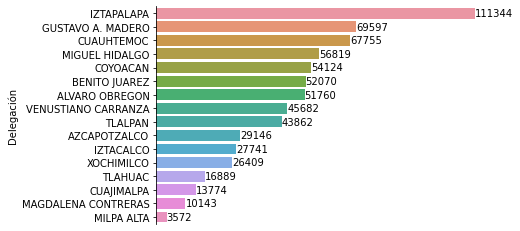

In [11]:
#Obteniendo la cantidad de incidentes viales por delegación
temp = df['delegacion_inicio'].value_counts().reset_index()
splot = sns.barplot(x=temp['delegacion_inicio'], y=temp['index'])

for p in splot.patches:
  width = p.get_width()
  splot.text(width + 1,
          p.get_y() + p.get_height() / 2,
          '{:1.0f}'.format(width),
          ha='left', va='center')
  
plt.xlabel('Count') 
plt.ylabel('Delegación')
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
sns.despine(top=True, right=True, bottom=True)
plt.show();

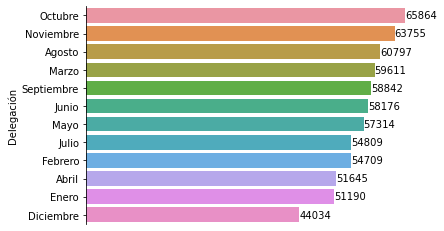

In [12]:
#Obteniendo los meses con más número de incidentes viales
temp = df['mes_cierre'].value_counts().reset_index()
splot = sns.barplot(x=temp['mes_cierre'], y=temp['index'])

# For loop to label each bar of the plot
for p in splot.patches:
  width = p.get_width()
  splot.text(width + 1,
          p.get_y() + p.get_height() / 2,
          '{:1.0f}'.format(width),
          ha='left', va='center')
  
plt.xlabel('Count') 
plt.ylabel('Delegación') 
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
sns.despine(top=True, right=True, bottom=True)
plt.show();

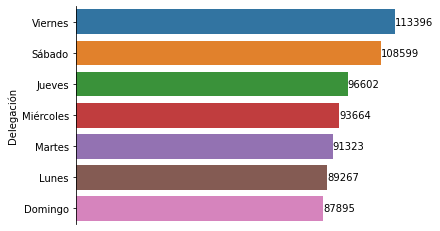

In [13]:
#Obteniendo la cantidad de incidentes viales por día de la semana
temp = df['dia_semana'].value_counts().reset_index()
splot = sns.barplot(x=temp['dia_semana'], y=temp['index'])

for p in splot.patches:
  width = p.get_width()
  splot.text(width + 1,
          p.get_y() + p.get_height() / 2,
          '{:1.0f}'.format(width),
          ha='left', va='center')
  
plt.xlabel('Count') 
plt.ylabel('Delegación') 
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
sns.despine(top=True, right=True, bottom=True)
plt.show();

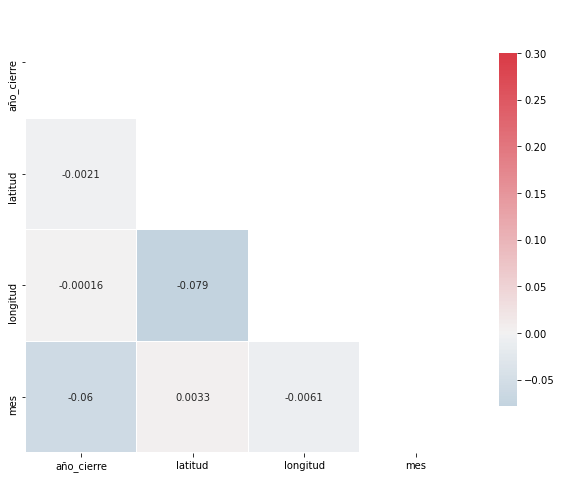

In [14]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool)) # Obtaining the superior triangular matrix

f, ax = plt.subplots(figsize=(10, 13)) # Setting the figure size
cmap = sns.diverging_palette(240, 10, as_cmap=True) # Setting the color palette of the correlation matrix

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=0.5, cbar_kws={'shrink': 0.5}, annot=True);

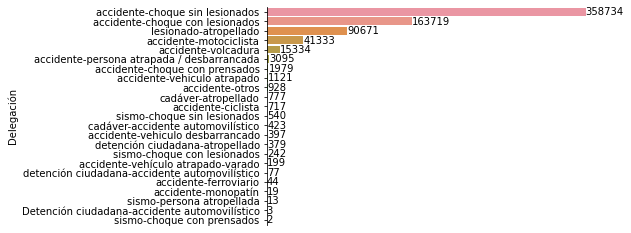

In [15]:
#Obteniendo la cantidad de incidentes viales por día de la semana
temp = df['incidente_c4'].value_counts().reset_index()
splot = sns.barplot(x=temp['incidente_c4'], y=temp['index'])

for p in splot.patches:
  width = p.get_width()
  splot.text(width + 1,
          p.get_y() + p.get_height() / 2,
          '{:1.0f}'.format(width),
          ha='left', va='center')
  
plt.xlabel('Count') 
plt.ylabel('Delegación') 
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
sns.despine(top=True, right=True, bottom=True)
plt.show();

In [16]:
#Primero conoceremos si existen valores faltantes
missing = df.isna().sum()
percent = round(df.isna().sum() / df.shape[0]*100, 2)

value = {
    'Valores faltantes': missing,
    'Porcentaje %': percent
}

pd.DataFrame(value)

,Valores faltantes,Porcentaje %
folio,0,0.00
fecha_creacion,0,0.00
hora_creacion,0,0.00
dia_semana,0,0.00
codigo_cierre,0,0.00
fecha_cierre,0,0.00
año_cierre,0,0.00
mes_cierre,0,0.00
hora_cierre,0,0.00
delegacion_inicio,59,0.01


In [17]:
df['delegacion_inicio'].fillna(df['delegacion_inicio'].mode()[0], inplace=True)
df['delegacion_cierre'].fillna(df['delegacion_cierre'].mode()[0], inplace=True)

In [18]:
missing = df.isna().sum()
percent = round(df.isna().sum() / df.shape[0]*100, 2)

value = {
    'Valores faltantes': missing,
    'Porcentaje %': percent
}

pd.DataFrame(value)

,Valores faltantes,Porcentaje %
folio,0,0.00
fecha_creacion,0,0.00
hora_creacion,0,0.00
dia_semana,0,0.00
codigo_cierre,0,0.00
fecha_cierre,0,0.00
año_cierre,0,0.00
mes_cierre,0,0.00
hora_cierre,0,0.00
delegacion_inicio,0,0.00


In [19]:
df.dropna(inplace=True)

In [20]:
#Comprobamos que ya no existan valores faltantes en nuestro dataset
missing = df.isna().sum()
percent = round(df.isna().sum() / df.shape[0]*100, 2)

value = {
    'Valores faltantes': missing,
    'Porcentaje %': percent
}

pd.DataFrame(value)

,Valores faltantes,Porcentaje %
folio,0,0.0
fecha_creacion,0,0.0
hora_creacion,0,0.0
dia_semana,0,0.0
codigo_cierre,0,0.0
fecha_cierre,0,0.0
año_cierre,0,0.0
mes_cierre,0,0.0
hora_cierre,0,0.0
delegacion_inicio,0,0.0


In [21]:
df = df.drop(df[df['clas_con_f_alarma']=='FALSA ALARMA'].index)

In [22]:
riesgos = {'accidente-choque sin lesionados':'bajo', 'sismo-choque sin lesionados':'bajo', 'accidente-motociclista':'alto',
           'accidente-otros':'alto', 'accidente-vehiculo atrapado':'alto', 'detención ciudadana-atropellado':'alto', 'detención ciudadana-accidente automovilístico':'alto', 
           'accidente-vehículo atrapado-varado':'alto', 'accidente-monopatín':'alto', 'Detención ciudadana-accidente automovilístico':'alto', 
           'accidente-choque con lesionados':'alto', 'lesionado-atropellado':'alto', 'accidente-volcadura':'alto', 'accidente-persona atrapada / desbarrancada':'alto', 
           'accidente-vehiculo desbarrancado':'alto', 'accidente-choque con prensados':'alto', 'cadáver-atropellado':'alto', 'cadáver-accidente automovilístico':'alto', 
           'accidente-ferroviario':'alto', 'sismo-persona atropellada':'alto', 'sismo-choque con lesionados':'alto', 'sismo-choque con prensados':'alto', 
           'accidente-ciclista':'alto'}

In [23]:
df["tipo_riesgo"]=df["incidente_c4"].map(riesgos)

C:\Users\samir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


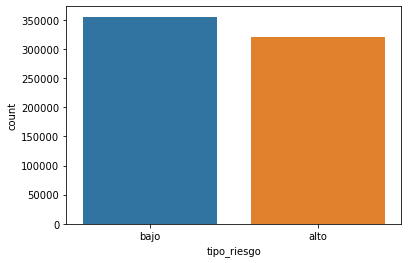

In [24]:
#Observamos la distribución del tipo de riesgo de todos los incidentes
sns.countplot(df['tipo_riesgo'])
plt.show()

In [25]:
df['fecha_creacion']=df['fecha_creacion'].astype('datetime64[ns]')
df['hora_creacion']=df['hora_creacion'].astype('datetime64[ns]')
df = df.assign( fecha = df['fecha_creacion'].dt.strftime("%d/%m/20%y"))
df = df.assign( tiempo = df['hora_creacion'].dt.strftime("%H:%M:%S"))
df = df.assign( hora = df.tiempo.str[:2])
df = df.assign( minuto = df.tiempo.str[3:5])
df = df.assign( segundo = df.tiempo.str[6:8])

In [26]:
df=df.assign(dia =  df['fecha_creacion'].dt.strftime("%d"))
df=df.assign(mes =  df['fecha_creacion'].dt.strftime("%m"))
df=df.assign(año =  df['fecha_creacion'].dt.strftime("20%y"))

In [27]:
df['hora']=df['hora'].astype(int)
df['minuto']=df['minuto'].astype(int)
df['segundo']=df['segundo'].astype(int)
df['fecha']=df['fecha'].astype('datetime64[ns]')
df['dia']=df['dia'].astype(int)
df['mes']=df['mes'].astype(int)
df['año']=df['año'].astype(int)

C:\Users\samir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


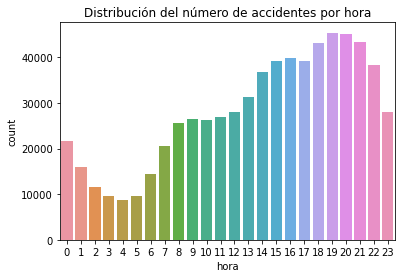

In [28]:
sns.countplot(df['hora'])
plt.title('Distribución del número de accidentes por hora')
plt.show()

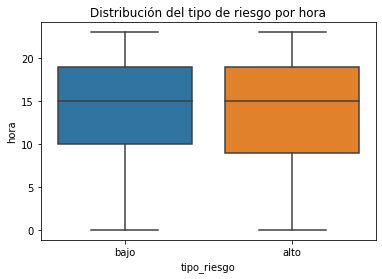

In [29]:
#Observamos en qué horas es cuando más se producen incidentes por tipo de riesgo
sns.boxplot(x='tipo_riesgo', y='hora', data=df)
plt.title('Distribución del tipo de riesgo por hora')
plt.show()

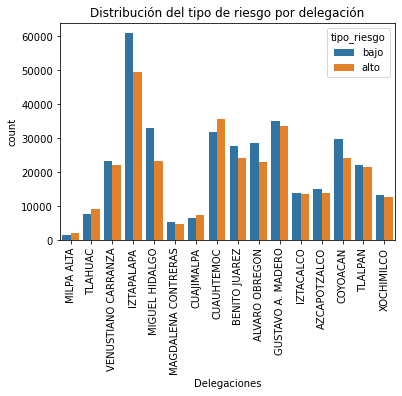

In [30]:
sns.countplot(x="delegacion_inicio", hue="tipo_riesgo",
                   data=df,)
plt.title('Distribución del tipo de riesgo por delegación')
plt.xlabel('Delegaciones')
plt.xticks(rotation=90)
plt.show()

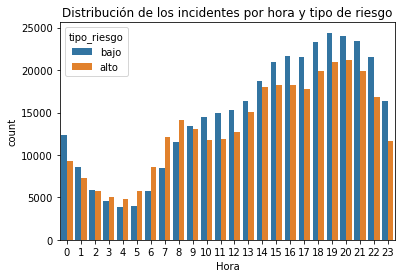

In [31]:
sns.countplot(x="hora", hue="tipo_riesgo",
                   data=df,)
plt.title('Distribución de los incidentes por hora y tipo de riesgo')
plt.xlabel('Hora')
plt.xticks(rotation=0)
plt.show()

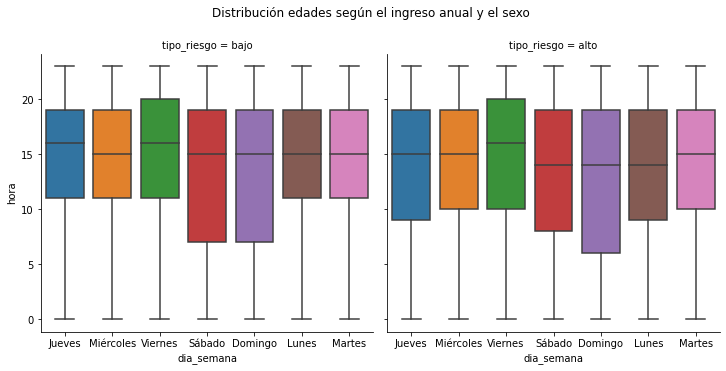

In [32]:
diag = sns.catplot(x = 'dia_semana', data=df, y='hora',col='tipo_riesgo',kind='box')
plt.subplots_adjust(top=0.85)
diag.fig.suptitle('Distribución edades según el ingreso anual y el sexo')
plt.show()

In [33]:
#Filtro de los incidentes de riesgo alto, que sucedieron un día viernes entre las 18:00 y 21:00 horas
df_horas_incidentes= df[(df['hora']>=18)&(df['hora']<=21)&(df['tipo_riesgo']=='alto')&(df['dia_semana']=='Viernes')] #filtro entre dos horas

In [34]:
!pip install folium

import folium
from folium.plugins import HeatMap
hmap = folium.Map(location = [19.435960, -99.141558])
hm_wide = HeatMap(list(zip(df_horas_incidentes.latitud.values, df_horas_incidentes.longitud.values)))
hmap.add_child(hm_wide)
hmap

In [35]:
#Creamos una copia de nuestro dataser para trabajar en la copoa
dataset = df.copy() 
dataset.head()

,folio,fecha_creacion,hora_creacion,dia_semana,codigo_cierre,fecha_cierre,año_cierre,mes_cierre,hora_cierre,delegacion_inicio,...,geopoint,mes,tipo_riesgo,fecha,tiempo,hora,minuto,segundo,dia,año
0,C5/170622/06952,2017-06-22,2021-06-07 20:34:45,Jueves,(D) El incidente reportado se registró en dos ...,22/06/2017,2017,Junio,20:39:42,MILPA ALTA,...,"19.20137004,-99.00731988",6,bajo,2017-06-22,20:34:45,20,34,45,22,2017
1,C5/170622/05115,2017-06-22,2021-06-07 16:41:14,Jueves,(D) El incidente reportado se registró en dos ...,22/06/2017,2017,Junio,16:46:02,TLAHUAC,...,"19.29659004,-99.03443004",6,bajo,2017-06-22,16:41:14,16,41,14,22,2017
2,C5/170622/03715,2017-06-22,2021-06-07 13:44:52,Jueves,(N) La unidad de atención a emergencias fue de...,22/06/2017,2017,Junio,16:48:07,VENUSTIANO CARRANZA,...,"19.43053002,-99.05259996",6,bajo,2017-06-22,13:44:52,13,44,52,22,2017
3,C5/170622/05317,2017-06-22,2021-06-07 17:08:58,Jueves,(D) El incidente reportado se registró en dos ...,22/06/2017,2017,Junio,17:20:34,IZTAPALAPA,...,"19.36188999,-99.12242988",6,alto,2017-06-22,17:08:58,17,8,58,22,2017
4,C5/170622/05348,2017-06-22,2021-06-07 17:12:38,Jueves,(D) El incidente reportado se registró en dos ...,22/06/2017,2017,Junio,17:25:27,IZTAPALAPA,...,"19.36168002,-99.12210012",6,alto,2017-06-22,17:12:38,17,12,38,22,2017


In [36]:
for i in dataset.columns:
  print(f'''{i} - valores únicos: {len(dataset[i].unique())}
               dtype: {dataset[i].dtype}''')

folio - valores únicos: 675053
               dtype: object
fecha_creacion - valores únicos: 1066
               dtype: datetime64[ns]
hora_creacion - valores únicos: 85100
               dtype: datetime64[ns]
dia_semana - valores únicos: 7
               dtype: object
codigo_cierre - valores únicos: 5
               dtype: object
fecha_cierre - valores únicos: 1188
               dtype: object
año_cierre - valores únicos: 3
               dtype: int64
mes_cierre - valores únicos: 12
               dtype: object
hora_cierre - valores únicos: 103938
               dtype: object
delegacion_inicio - valores únicos: 16
               dtype: object
incidente_c4 - valores únicos: 23
               dtype: object
latitud - valores únicos: 53403
               dtype: float64
longitud - valores únicos: 51577
               dtype: float64
clas_con_f_alarma - valores únicos: 3
               dtype: object
tipo_entrada - valores únicos: 7
               dtype: object
delegacion_cierre - valores úni

In [37]:
dataset.drop([ 'folio', 'fecha_creacion', 'hora_creacion', 'codigo_cierre', 'fecha_cierre', 'año_cierre', 'mes_cierre', 'hora_cierre', 
              'incidente_c4', 'clas_con_f_alarma','tipo_entrada', 'delegacion_cierre', 'geopoint', 'fecha', 'tiempo', 'segundo', 'año', 'delegacion_inicio', 'dia'], axis=1, inplace=True)

In [38]:
dataset['tipo_riesgo'] = dataset.tipo_riesgo.map({'bajo':1, 'alto':2})

In [39]:
dataset['dia_semana'] =dataset.dia_semana.map({'Lunes':1, 'Martes':2, 'Miércoles':3, 'Jueves':4, 'Viernes':5, 'Sábado':6, 'Domingo':7})

In [40]:
# Separando en columnas categóricas y numéricaas
#cat_cols = ['dia_semana']
num_cols = ['dia_semana','latitud', 'longitud', 'mes', 'hora', 'minuto']

In [41]:
X = dataset.drop('tipo_riesgo', axis=1) # Variables predictoras
y = dataset['tipo_riesgo'] # Objective variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [42]:
transformer = make_column_transformer(
    (RobustScaler(), num_cols),                 # Valores numéricos
    )

transformer.fit(X_train) # Se ajusta con los datos de entrenamiento

X_train = transformer.transform(X_train) # Transforma los datos de entrenamiento
X_test = transformer.transform(X_test) # Transforma los datos de prueba

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score

clasificador = DecisionTreeClassifier(max_depth=30)
clasificador.fit(X_train, y_train)

#Realizamos predicciones en el conjunto de prueba
y_pred = clasificador.predict(X_test)

r_sq = clasificador.score(X_test, y_test)
print('R^2: {:.2f}'.format(r_sq))

mae = mean_absolute_error(y_test, y_pred)
print('MAE: {:.2f}'.format(mae))

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('RMSE: {:.2f}'.format(rmse))

R^2: 0.67
MAE: 0.33
RMSE: 0.58


In [44]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

#Realizamos predicciones en el conjunto de prueba
y_pred = knn.predict(X_test)

r_sq = knn.score(X_test, y_test)
print('R^2: {:.2f}'.format(r_sq))

mae = mean_absolute_error(y_test, y_pred)
print('MAE: {:.2f}'.format(mae))

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('RMSE: {:.2f}'.format(rmse))

R^2: 0.63
MAE: 0.37
RMSE: 0.61


In [45]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, y_train)

#Realizamos predicciones en el conjunto de prueba
y_pred = LDA.predict(X_test)

r_sq = LDA.score(X_test, y_test)
print('R^2: {:.2f}'.format(r_sq))

mae = mean_absolute_error(y_test, y_pred)
print('MAE: {:.2f}'.format(mae))

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('RMSE: {:.2f}'.format(rmse))

R^2: 0.54
MAE: 0.46
RMSE: 0.68


In [46]:
from sklearn.naive_bayes import GaussianNB

gb = GaussianNB()
gb.fit(X_train, y_train)

#Realizamos predicciones en el conjunto de prueba
y_pred = gb.predict(X_test)

r_sq = gb.score(X_test, y_test)
print('R^2: {:.2f}'.format(r_sq))

mae = mean_absolute_error(y_test, y_pred)
print('MAE: {:.2f}'.format(mae))

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('RMSE: {:.2f}'.format(rmse))

R^2: 0.54
MAE: 0.46
RMSE: 0.68


In [47]:
def clasificacion(knn, x):
  riesgo = knn.predict([x])[0]
  proba = knn.predict_proba([x])
  if riesgo == 1:
    riesgo = 'Bajo'
  elif riesgo ==2:
    riesgo = 'Alto'

  print("El riesgo de un accidente grave es: "+riesgo)

In [48]:
clasificacion(knn, (1, 19.29659, -99.03443, 2, 11, 41 ))

El riesgo de un accidente grave es: Bajo


In [49]:
clasificacion(knn, (4, 19.36189, -99.12243, 6, 17, 8 ))

El riesgo de un accidente grave es: Alto


In [50]:
import joblib
joblib.dump(knn, 'Modelo/model.pkl', compress = 1)

['Modelo/model.pkl']

In [51]:
new_model = joblib.load('Modelo/model.pkl')